In [ ]:
!pip install statsmodels

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


In [ ]:
data=pd.read_csv('/content/tips (data for regression problem).csv')

In [ ]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [ ]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
print(data.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [ ]:
print(data.dtypes)

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object


 plotting histogram to see frequency of total bill and tip


Text(137.72222222222223, 0.5, 'Frequency')

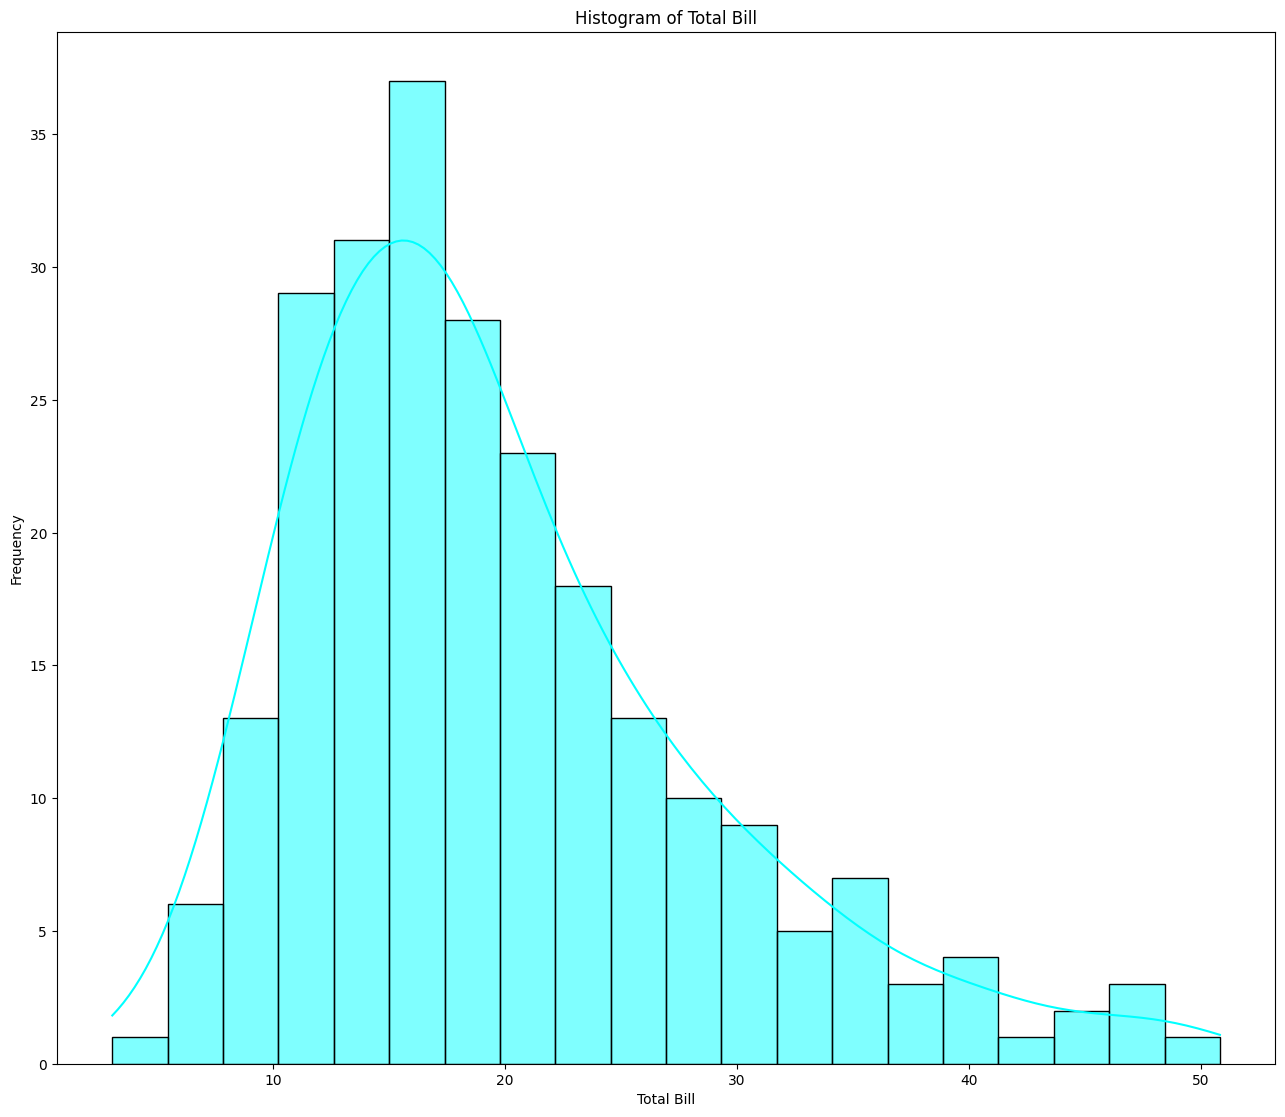

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(14, 12))
fig.tight_layout(pad=5.0)

#histogram of total bill vs frequency
sns.histplot(data['total_bill'], kde=True, bins=20, color='cyan', ax=axs)
axs.set_title('Histogram of Total Bill')
axs.set_xlabel('Total Bill')
axs.set_ylabel('Frequency')

Text(137.72222222222223, 0.5, 'Frequency')

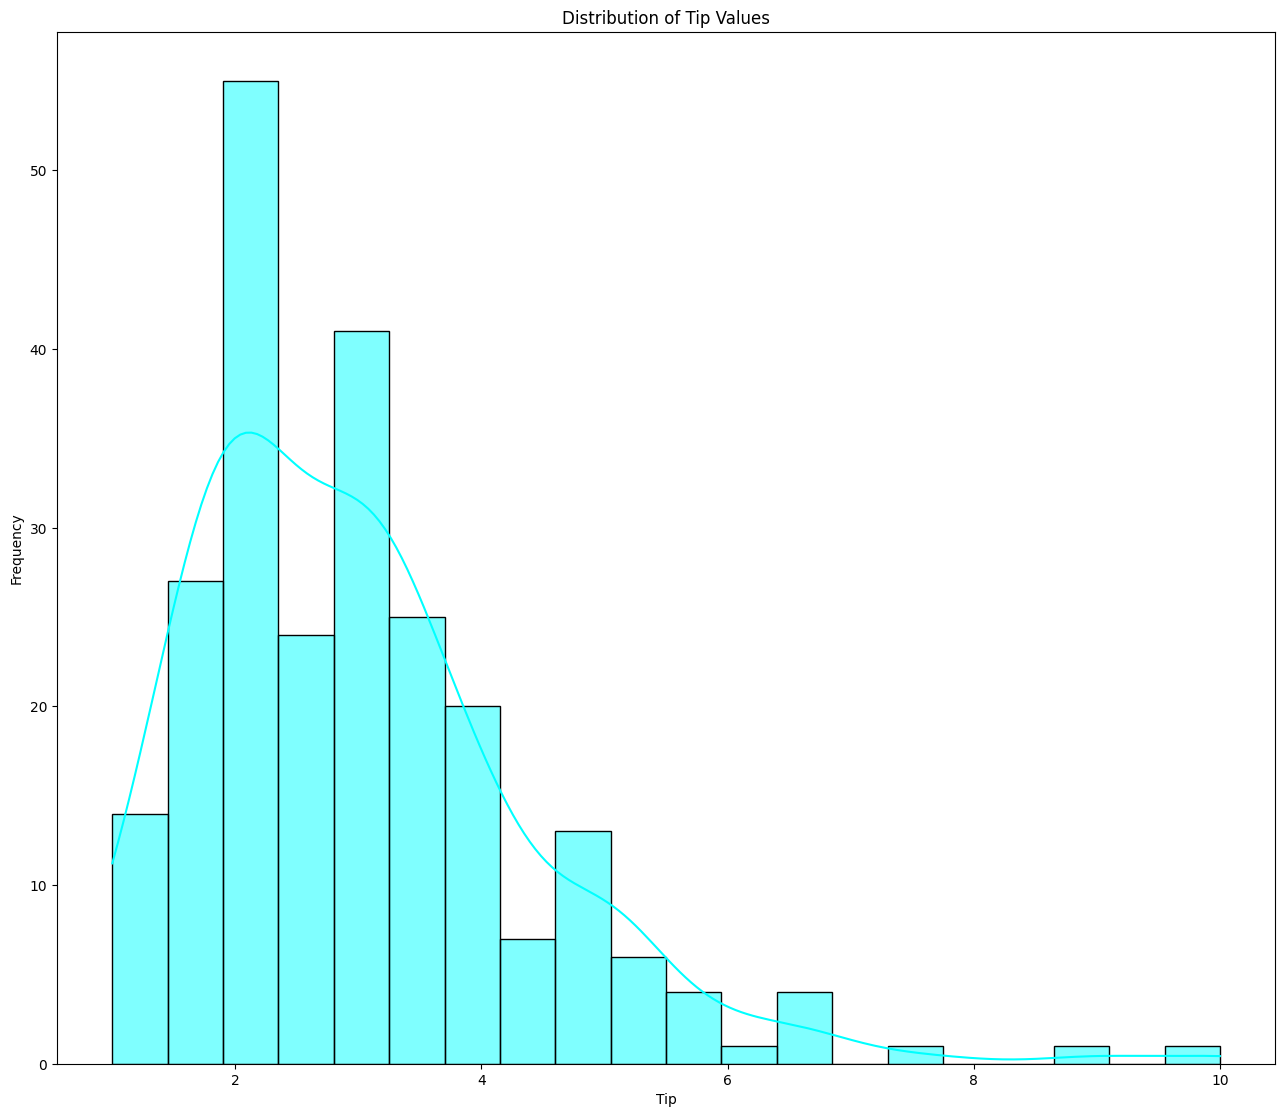

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(14, 12))
fig.tight_layout(pad=5.0)
# Plot histogram for Tip
sns.histplot(data['tip'], kde=True, bins=20, color='cyan', ax=axs)
axs.set_title('Distribution of Tip Values')
axs.set_xlabel('Tip')
axs.set_ylabel('Frequency')

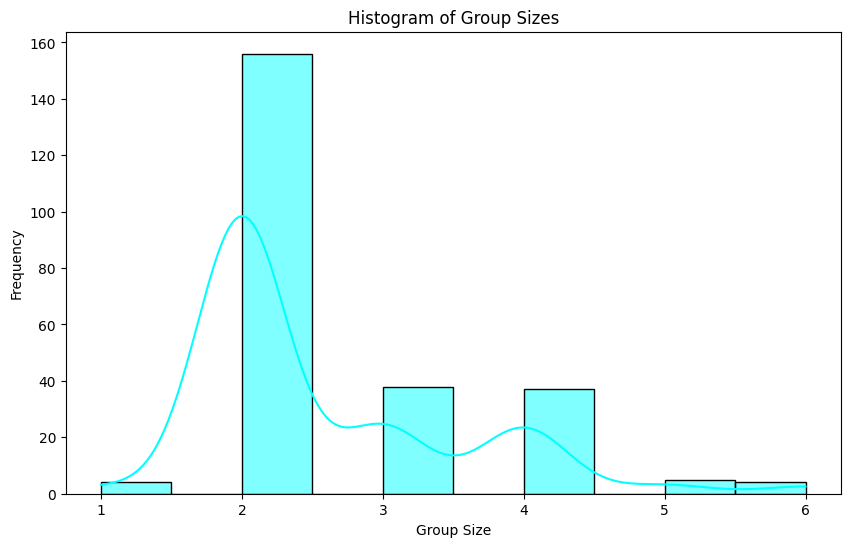

In [ ]:
#histogram of size vs frequency
plt.figure(figsize=(10, 6))
sns.histplot(data['size'], bins=10, kde=True, color='cyan')
plt.title('Histogram of Group Sizes')
plt.xlabel('Group Size')
plt.ylabel('Frequency')
plt.show()


<ipython-input-27-42657bdcde60>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sex', palette='pastel', ax=axs)


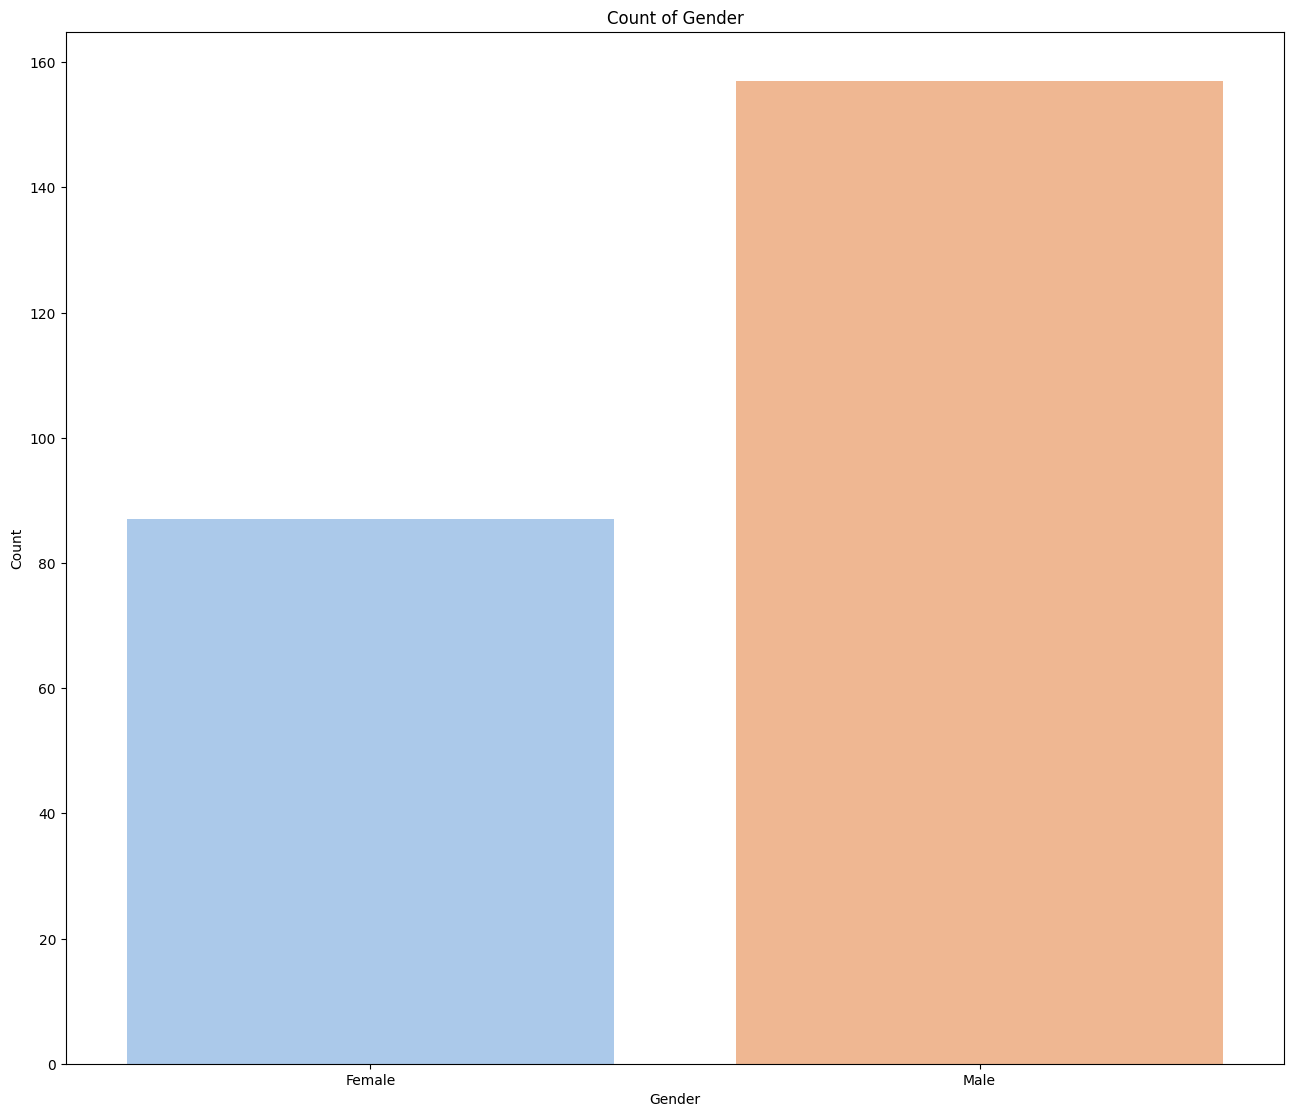

<ipython-input-27-42657bdcde60>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='smoker', palette='pastel', ax=axs)


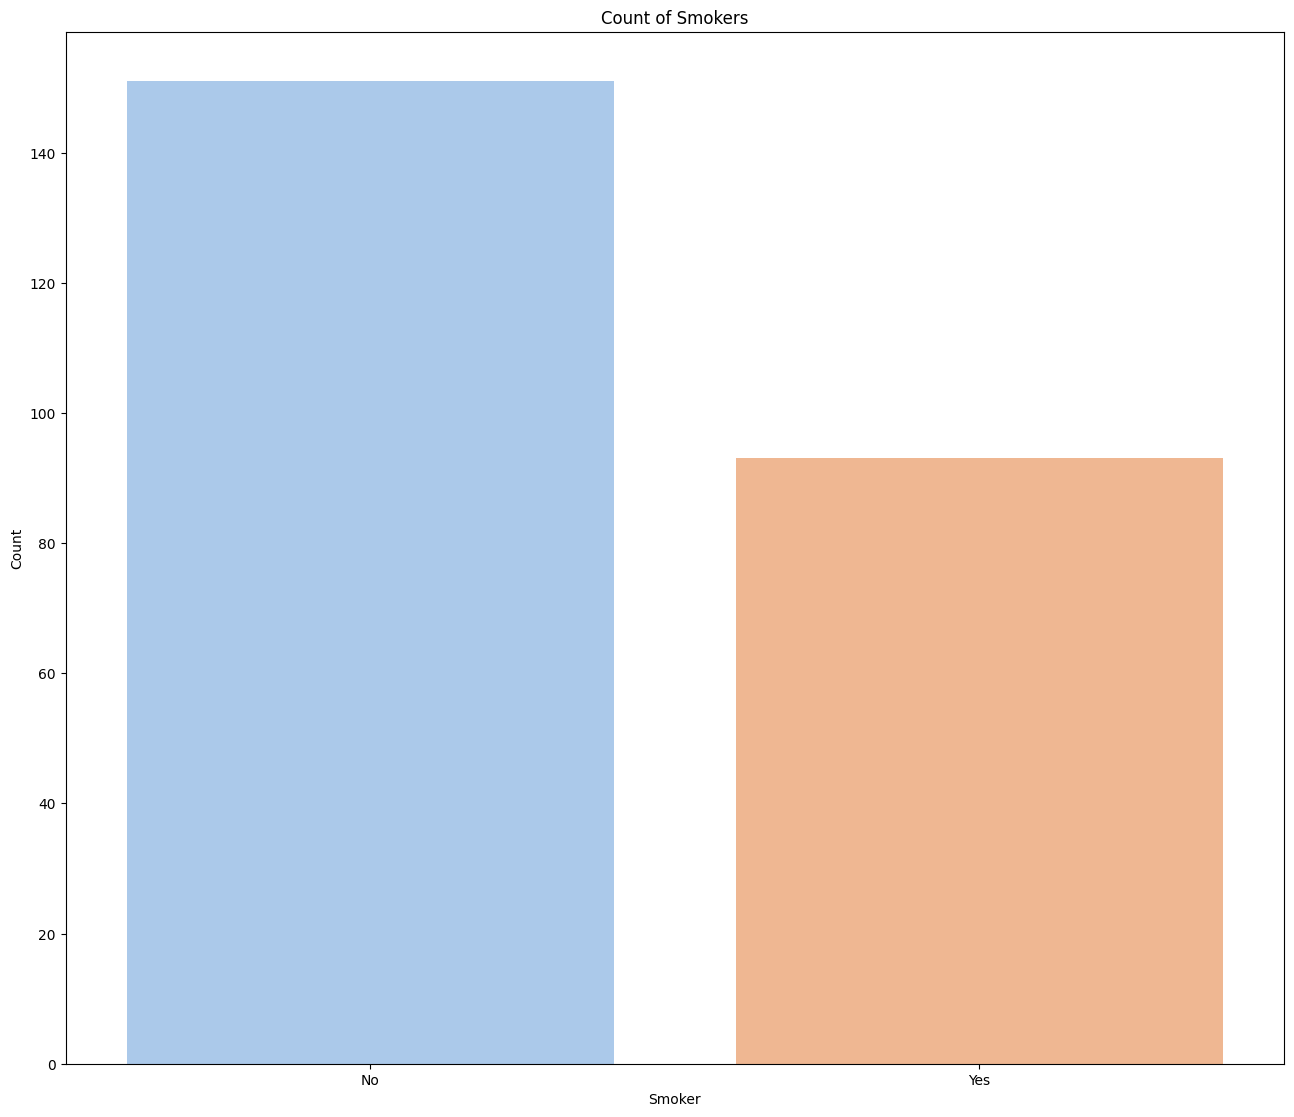

<ipython-input-27-42657bdcde60>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='day', palette='pastel', ax=axs)


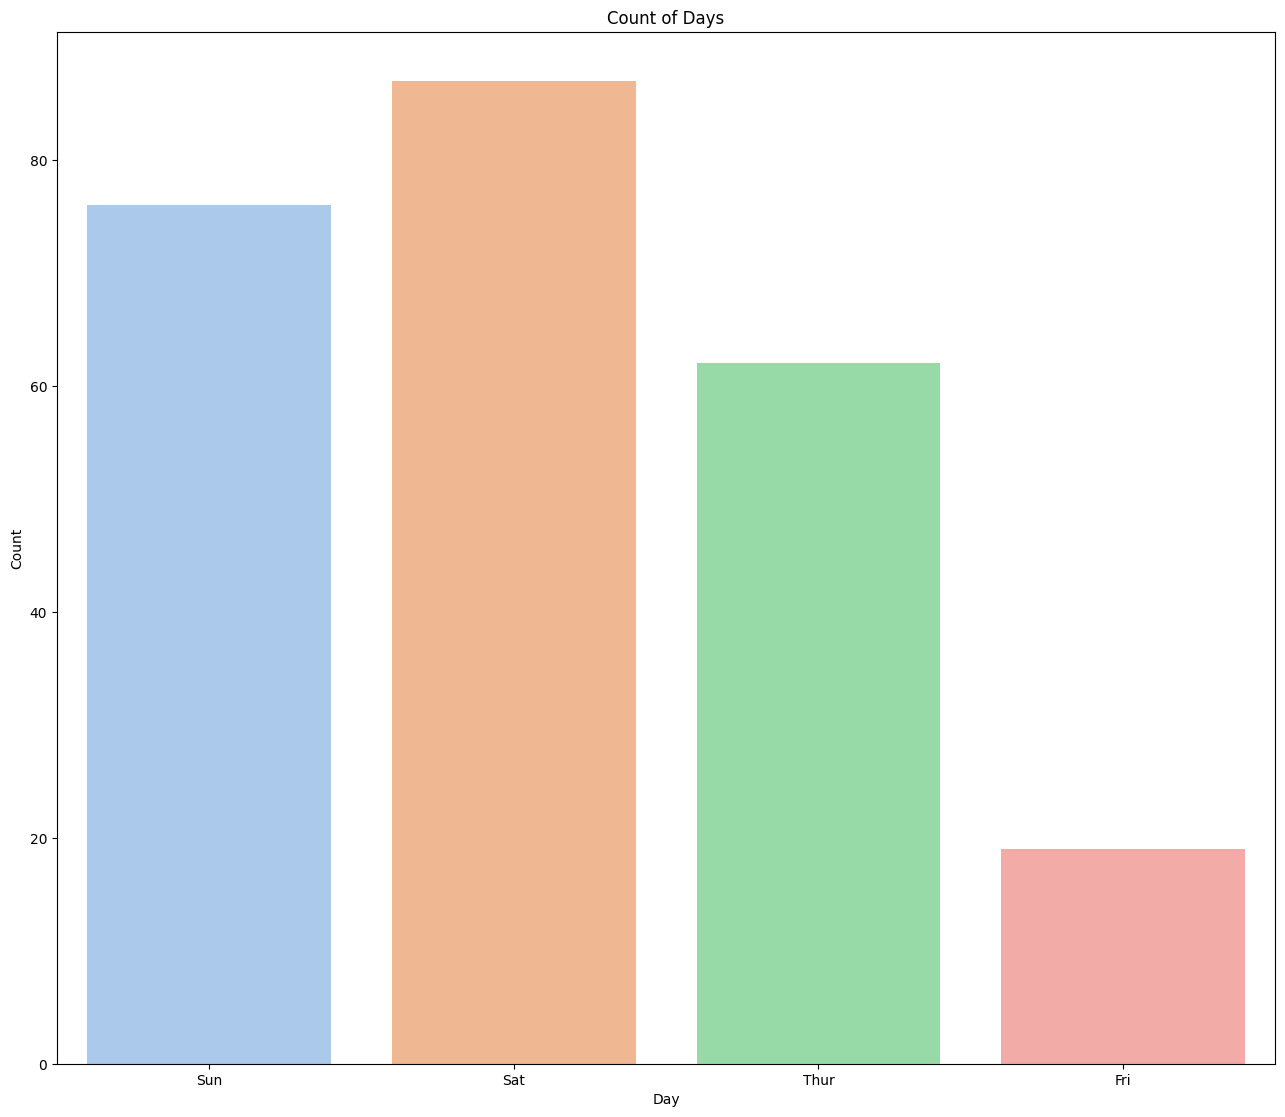

<ipython-input-27-42657bdcde60>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='time', palette='pastel', ax=axs)


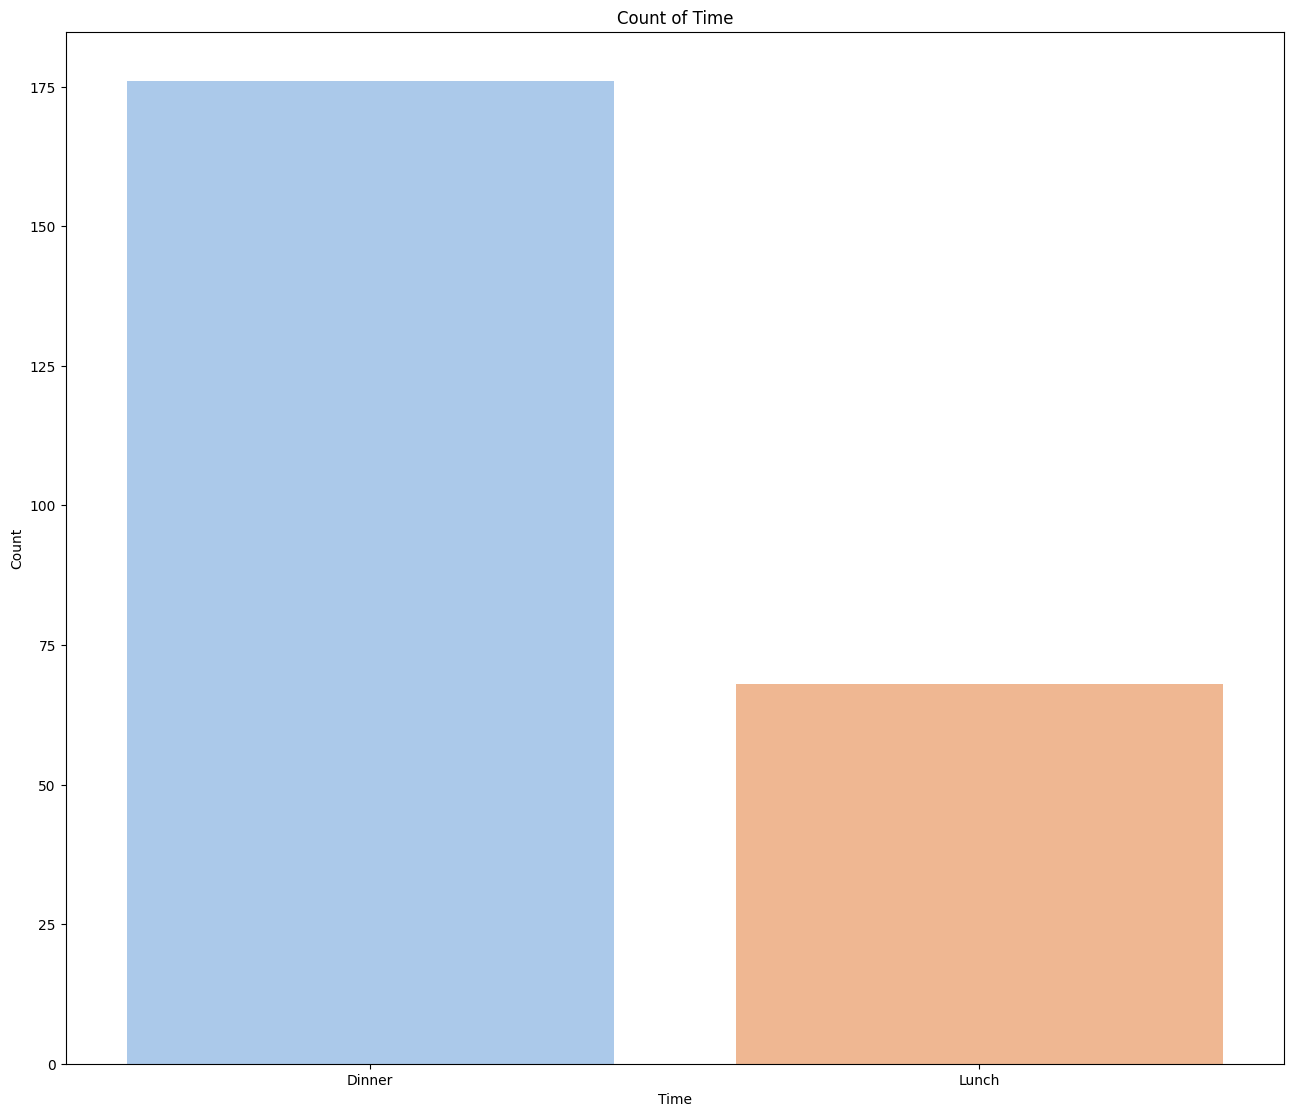

In [ ]:
#Count plot for gender
fig, axs = plt.subplots(1, 1, figsize=(14, 12))
fig.tight_layout(pad=5.0)
sns.countplot(data=data, x='sex', palette='pastel', ax=axs)
axs.set_title('Count of Gender')
axs.set_xlabel('Gender')
axs.set_ylabel('Count')
plt.show()

# Count plot for Smoker
fig, axs = plt.subplots(1, 1, figsize=(14, 12))
fig.tight_layout(pad=5.0)
sns.countplot(data=data, x='smoker', palette='pastel', ax=axs)
axs.set_title('Count of Smokers')
axs.set_xlabel('Smoker')
axs.set_ylabel('Count')
plt.show()

# Count plot for Days
fig, axs = plt.subplots(1, 1, figsize=(14, 12))
fig.tight_layout(pad=5.0)
sns.countplot(data=data, x='day', palette='pastel', ax=axs)
axs.set_title('Count of Days')
axs.set_xlabel('Day')
axs.set_ylabel('Count')
plt.show()

# Count plot for Time
fig, axs = plt.subplots(1, 1, figsize=(14, 12))
fig.tight_layout(pad=5.0)
sns.countplot(data=data, x='time', palette='pastel', ax=axs)
axs.set_title('Count of Time')
axs.set_xlabel('Time')
axs.set_ylabel('Count')
plt.show()

#UNIVARIATE ANALYSIS

## A)from histogram
1)total bill vs frequency shows  major frequency is in the region of 10 to 20.

2)tip vs frquency shows majority of tips lie in the values of 2 to 4 dollars.

3)most frequent tip:- 2 dollars

4)Size vs frequencty showa majorly people come in group of 2

##B)from count plots

1)male customers>female customers
two reasons can be there

 a)female needs are not satisfied

 b)the earning population in mostly men in that specific region

solution for:-

  a)working on female needs survey to be done


2)count plot for day shows most sales of restaurant happens on Saturday

reason can be there

 a)weekend time

leverage we can take

  a)introducing special menu on saturdays and sundays catering specially to local needs and survey

  b)special offers to regular customer or members on saturdays and sundays

  c)introducing new offers in these peak days to increase average order size value

3)dinner orders are more than lunch orders

things we can do

 a)introducing special themes occasionally during dinner time to attract customers

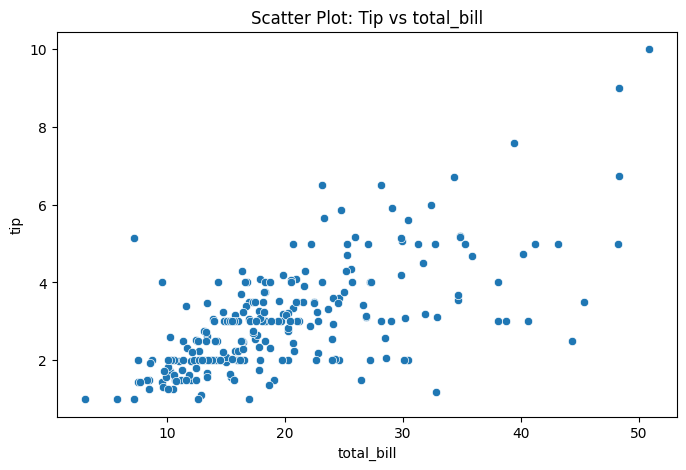

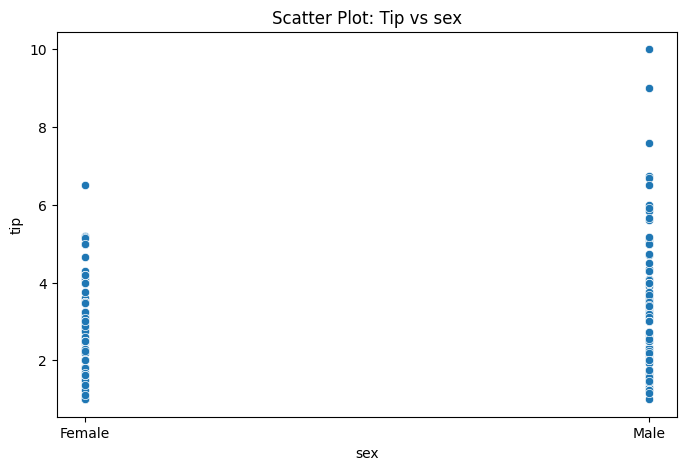

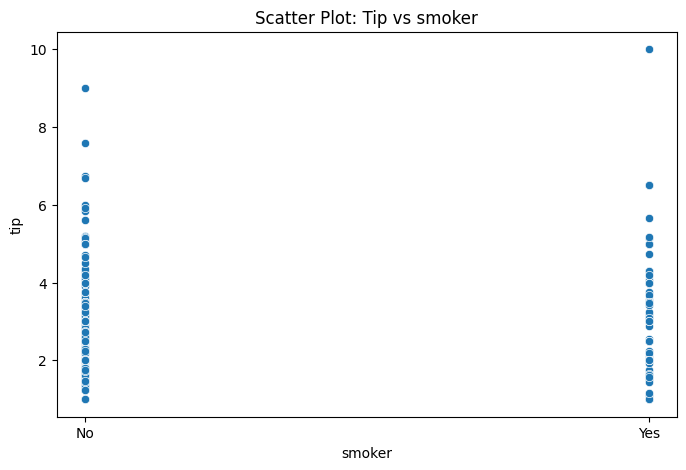

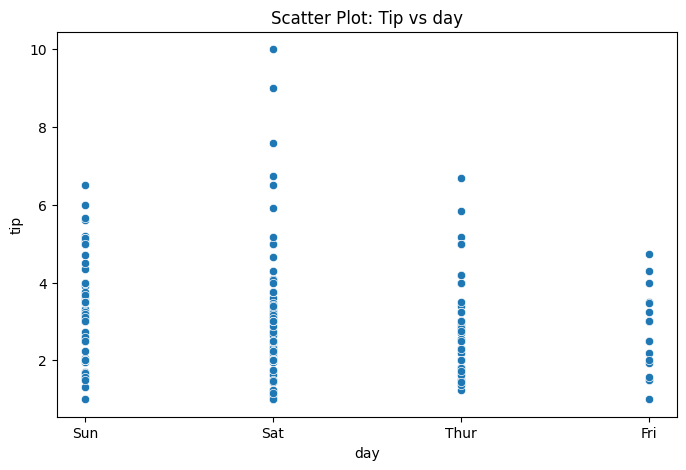

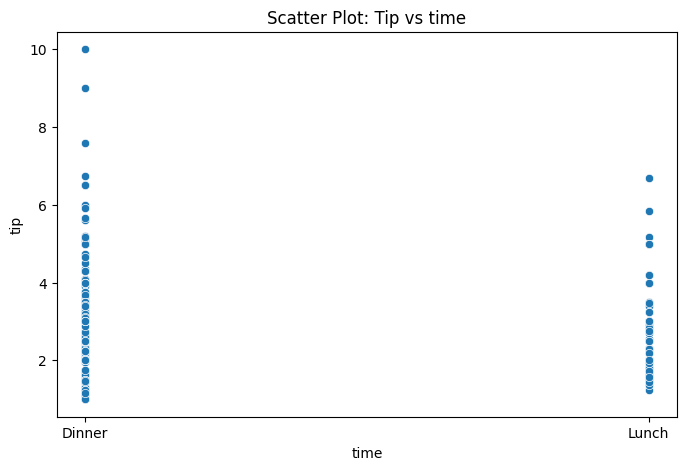

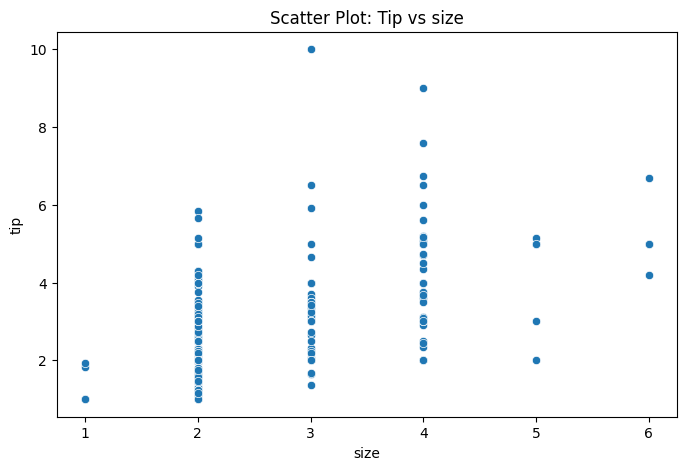

In [ ]:
#Scatter plots
predictors = ['total_bill','sex', 'smoker', 'day', 'time', 'size']

for predictor in predictors:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=data, x=predictor, y='tip')
    plt.title(f'Scatter Plot: Tip vs {predictor}')
    plt.show()

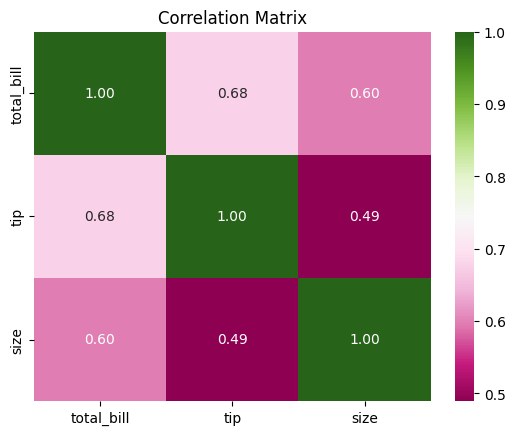

In [ ]:
#corelation matrix
numerical_data = data.select_dtypes(include=['number'])

sns.heatmap(numerical_data.corr(), annot=True, cmap='PiYG', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


#Analysis of correlation matrix

1)There's a strong positive relation between the total bill and the tip amount, meaning that as people spend more on their meal, they also tend to tip more.

2)The total bill and group size have a moderate positive connection, which suggests that bigger groups usually have larger bills. However, this link isn't as strong as the one between the total bill and tip, so there’s more variation in how much each group spends.

3)The connection between tip and group size is weaker. This means that while bigger groups might give larger total tips, the increase isn’t as consistent as it is with the total bill.

<ipython-input-20-5740fbe701d5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='day', y='total_bill', palette='pastel')


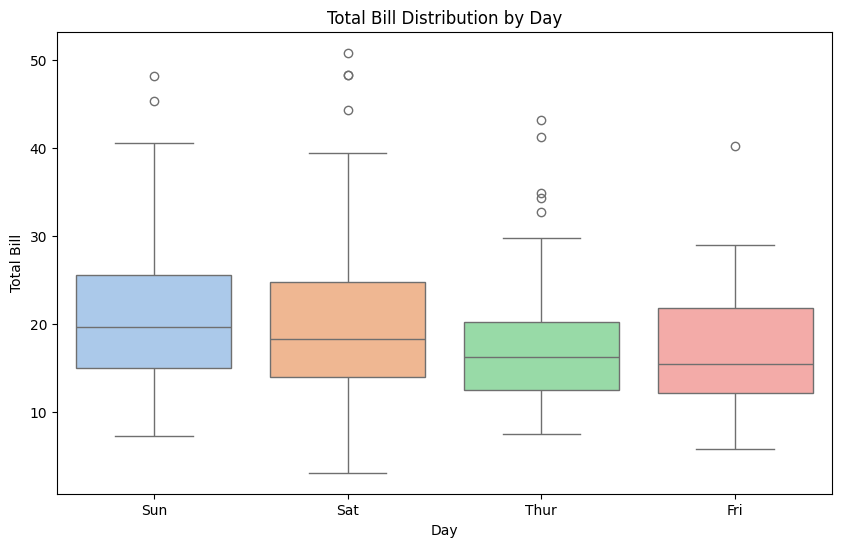

In [ ]:
# Box Plot for total_bill by day
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='day', y='total_bill', palette='pastel')
plt.title('Total Bill Distribution by Day')
plt.xlabel('Day')
plt.ylabel('Total Bill')
plt.show()


<ipython-input-21-bd7bc5458a65>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='time', y='tip', palette='pastel')


<Axes: xlabel='time', ylabel='tip'>

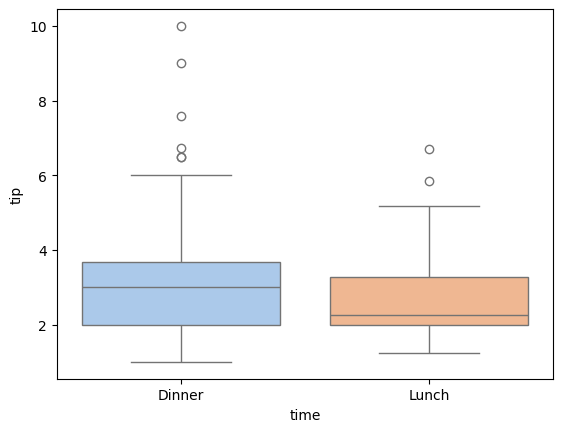

In [ ]:
sns.boxplot(data=data, x='time', y='tip', palette='pastel')

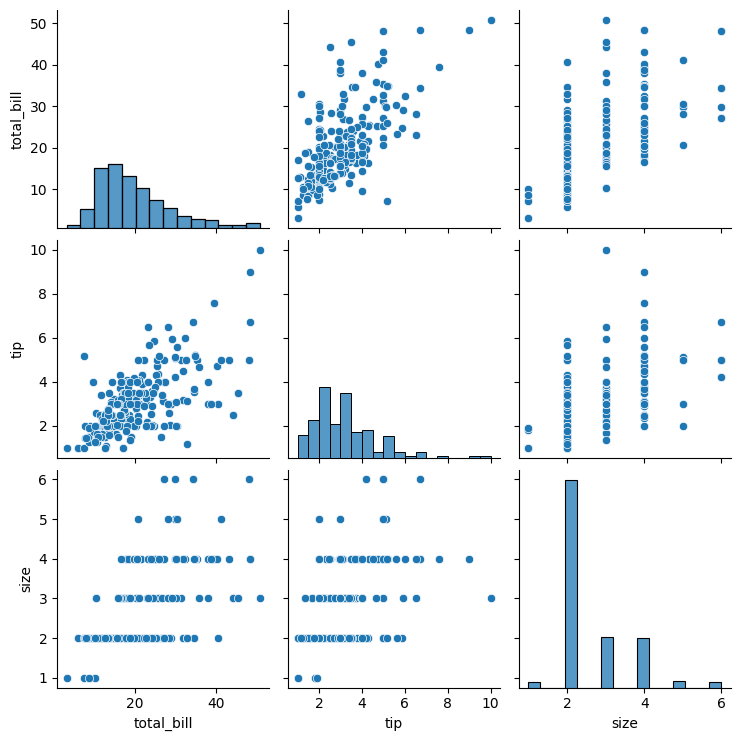

In [ ]:
sns.pairplot(data, vars=['total_bill', 'tip', 'size'])
plt.show()

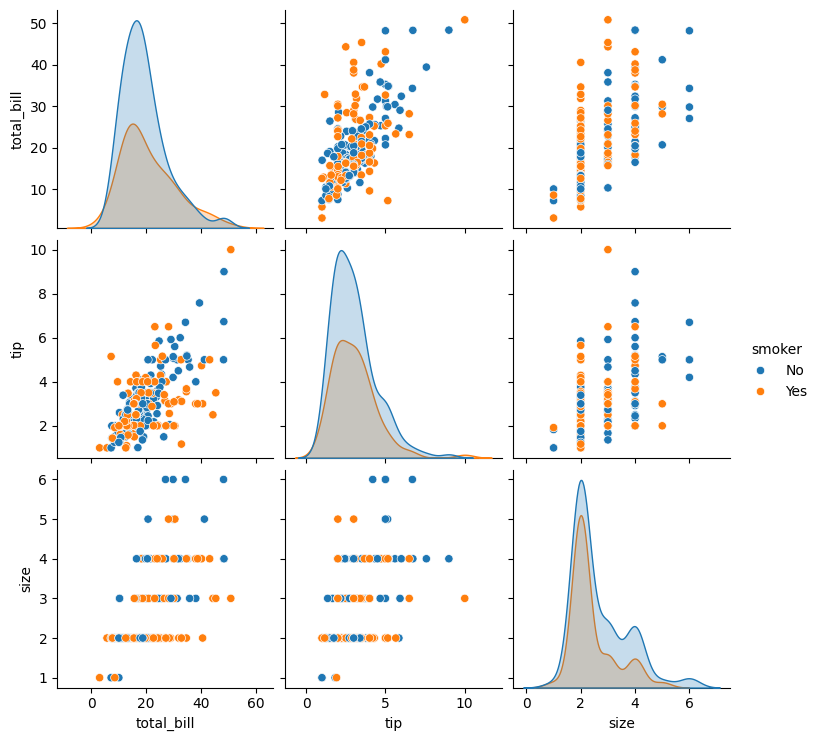

In [ ]:
sns.pairplot(data, vars=['total_bill', 'tip', 'size'], hue='smoker')
plt.show()

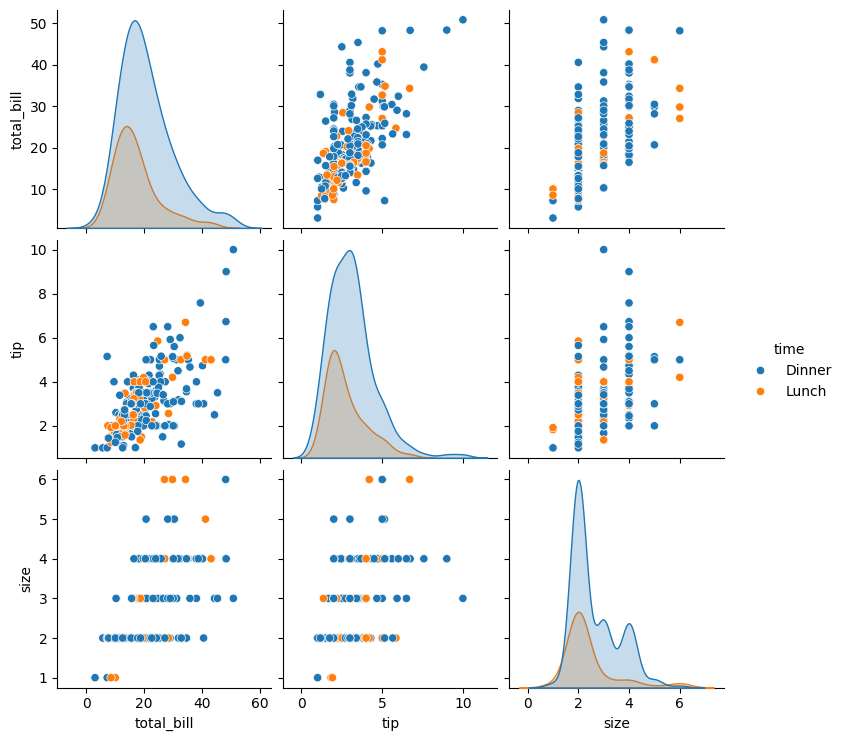

In [ ]:
sns.pairplot(data, vars=['total_bill', 'tip', 'size'], hue='time')
plt.show()

# BIVARIATE ANALYSIS
## BOXPLOT
1)Tip Distribution by lunch or dinner:-

 a)Customers tend to tip more generously during dinner than lunch, both in terms of median and overall variability.
conclusions stated above

2)Tip Distribution by Week days :-

 b)Higher tips on weekends often happen because more people go out to eat and in larger groups. Restaurants can make the most of this by adding extra staff or offering special deals on weekends, helping them serve the busy crowd better and increase their earnings from the higher spending and tipping that tends to happen.

#PAIRPLOT
1)total bill is proportional to size
2)total bill proportional to tip
3)smokers relatively tip more
4)people tip more in dinner(most probably due to more crowd during dinner)


rainbow test

In [ ]:
from statsmodels.stats.diagnostic import linear_rainbow
X = data[['total_bill', 'size']]
y = data['tip']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
rainbow_stat, rainbow_p_val = linear_rainbow(model) #fitting linear regression model

print(f"Rainbow Test Statistic: {rainbow_stat}, p-value: {rainbow_p_val}")


Rainbow Test Statistic: 1.1902656646832817, p-value: 0.17048935693447634


p-value (0.17) is greater than 0.05, we do not have enough evidence to reject the linearity assumption. This suggests that a linear relationship between the predictors (total_bill and size) and the response variable (tip) is appropriate for this model.

In [ ]:
X = data[['total_bill', 'size']].values
y = data['tip'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, lr_preds)))
print("Linear Regression R^2:", r2_score(y_test, lr_preds))

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_preds = ridge_model.predict(X_test)
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, ridge_preds)))
print("Ridge R^2:", r2_score(y_test, ridge_preds))

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_preds = lasso_model.predict(X_test)
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, lasso_preds)))
print("Lasso R^2:", r2_score(y_test, lasso_preds))

# Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, dt_preds)))
print("Decision Tree R^2:", r2_score(y_test, dt_preds))

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_preds)))
print("Random Forest R^2:", r2_score(y_test, rf_preds))

# Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_preds = svr_model.predict(X_test)
print("SVR RMSE:", np.sqrt(mean_squared_error(y_test, svr_preds)))
print("SVR R^2:", r2_score(y_test, svr_preds))

# K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)
print("KNN RMSE:", np.sqrt(mean_squared_error(y_test, knn_preds)))
print("KNN R^2:", r2_score(y_test, knn_preds))


Linear Regression RMSE: 0.805356827160701
Linear Regression R^2: 0.4811084097989494
Ridge RMSE: 0.8047555882326728
Ridge R^2: 0.4818828773627837
Lasso RMSE: 0.7686695421292249
Lasso R^2: 0.5273068720881756
Decision Tree RMSE: 1.0023492812551187
Decision Tree R^2: 0.1962183089778119
Random Forest RMSE: 0.9133503643578204
Random Forest R^2: 0.3326175906132479
SVR RMSE: 0.7312603678049858
SVR R^2: 0.572196812715273
KNN RMSE: 0.8599010859110602
KNN R^2: 0.40844253722501


SVR and lasso has the lowest rmse and high r square value so its the best fitting model

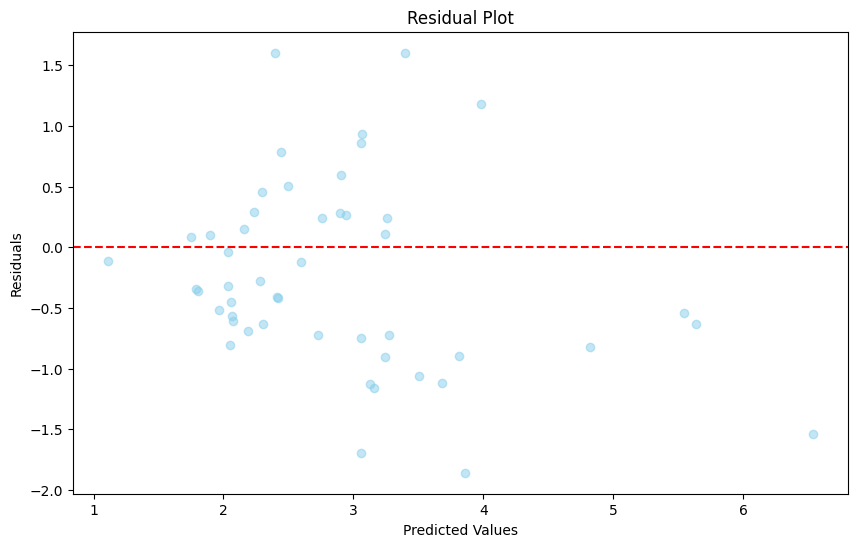

In [ ]:
import matplotlib.pyplot as plt
y_pred = lr_preds
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='skyblue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

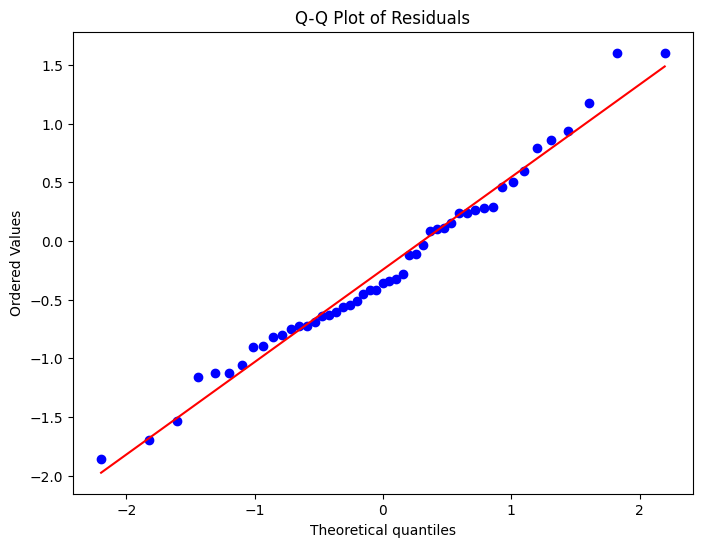

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5, 0.3, 0.01],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
}

svr = SVR(kernel='rbf')
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best RMSE (negative MSE):", -grid_search.best_score_)


Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Parameters: {'C': 100, 'epsilon': 0.5, 'gamma': 'scale'}
Best RMSE (negative MSE): 1.0670341600267694


In [54]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_svr = svr_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

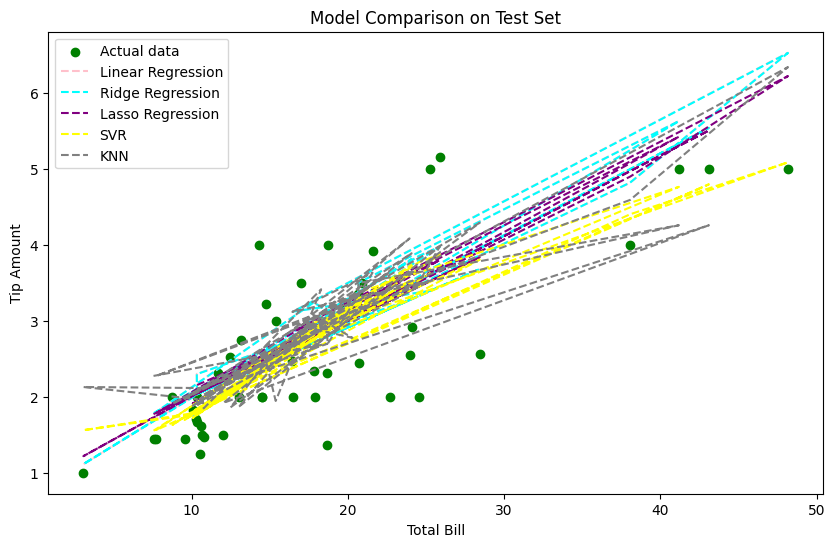

In [57]:
plt.figure(figsize=(10, 6))

plt.scatter(X_test[:, 0], y_test, color='green', label='Actual data')
plt.plot(X_test[:, 0], y_pred_linear, color='pink', label='Linear Regression', linestyle='--')
plt.plot(X_test[:, 0], y_pred_ridge, color='cyan', label='Ridge Regression', linestyle='--')
plt.plot(X_test[:, 0], y_pred_lasso, color='purple', label='Lasso Regression', linestyle='--')
plt.plot(X_test[:, 0], y_pred_svr, color='yellow', label='SVR', linestyle='--')
plt.plot(X_test[:, 0], y_pred_knn, color='grey', label='KNN', linestyle='--')


plt.title('Model Comparison on Test Set')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')
plt.legend()
plt.show()

1)Best Fit: Linear Regression (pink) and Ridge Regression (cyan) follow the trend of the actual data (green dots) pretty closely, making them likely good choices for predicting tips.

2)Positive Relationship: All models show that as the total bill increases, the tip amount generally increases too.

3)Outliers: There are some points where the actual data is quite far from the model predictions. No model fits these unusual points well.

4)Model Differences: Some models, like KNN (gray) and SVR (yellow), don't match the data trend as closely as Linear and Ridge Regression.

5)Overall Recommendation: Linear and Ridge Regression look like the best options among the models shown here.